In [4]:
import torch
x = torch.rand(5, 3)
print(x)
print(torch.cuda.is_available())

tensor([[0.3071, 0.8638, 0.1556],
        [0.4329, 0.4419, 0.3148],
        [0.7195, 0.4389, 0.8571],
        [0.7932, 0.1768, 0.4223],
        [0.5281, 0.0316, 0.3982]])
True


In [5]:
import os
import random
import seaborn as sns
import scipy
import numpy as np
import matplotlib.pyplot as plt
import torch
from sklearn.datasets import load_digits
from sklearn import datasets
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tt

In [6]:
# We implement our own very simple mixture, relying on scipy for the mixture
# components.

class SimpleGaussianMixture(object):

  def __init__(self, mixture_weights, mixture_components):
    self.mixture_weights = mixture_weights
    self.mixture_components = mixture_components

  def sample(self, num_samples, sample_seed=None):
    if(sample_seed):
        np.random.seed(seed=sample_seed)
        torch.random.manual_seed(seed=sample_seed)
    # First sample from the mixture
    mixture_choices = torch.multinomial(input=self.mixture_weights, num_samples=num_samples, replacement=True)
    # And then sample from the chosen mixture
    samples = torch.from_numpy(np.array(
          [self.mixture_components[mixture_choice].rvs(size=1)
           for mixture_choice in mixture_choices]))
    return mixture_choices, torch.squeeze(samples,1)

  def pdf(self, x):
    value = 0.
    for index, weight in enumerate(self.mixture_weights):
      # Assuming using scipy distributions for components
      value += weight * self.mixture_components[index].pdf(x)
    return value

In [ ]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)
r = norm.rvs(size=1000)
rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

In [ ]:
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')
ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

In [9]:
mix = 0.4
mixture_weight = torch.tensor([mix, 1.-mix], dtype=torch.float)
mixture_components = [scipy.stats.norm(loc=-1, scale=0.1), scipy.stats.norm(loc=1, scale=0.5)]
mixture_train = SimpleGaussianMixture(mixture_weight, mixture_components)
mixture_val = SimpleGaussianMixture(mixture_weight, mixture_components)

In [ ]:
mixture_val.sample(10).shape

In [ ]:
mixture.pdf([10, 1])
for i in range(101,1000):
    train_samples = mixture.sample(100000)
    torch.save(train_samples,'test_gmm_data/train_gmm_'+str(i)+'.pt')
    test_samples = mixture.sample(20000)
    torch.save(test_samples,'train_gmm_data/test_gmm_'+str(i)+'.pt')

In [ ]:
sample_class , sample = mixture.sample(num_samples=5) 
print(sample_class)
print(sample)
#model(sample)
#RuntimeError: expected scalar type Double but found Float
#model(sample.float())
#RuntimeError: expected scalar type Double but found Float
#model(sample.double())
#RuntimeError: expected scalar type Double but found Float
#model.float()
#model(sample.to(device))
#RuntimeError: expected scalar type Float but found Double
#model(sample.float().to(device), reduction='sum', mode='discriminator')
model(sample.float().to(device), reduction='sum', mode='generator')


In [7]:
class OneDGMMDataset(Dataset):
    def __init__(self, batch_length, mixture, transform=None):
        self.transform = transform
        self.batch_length = batch_length
        self.mixture = mixture

    def __len__(self):
        return self.batch_length

    def __getitem__(self, idx):
        sample_class , sample_data = self.mixture.sample(num_samples=1,sample_seed = idx) 
        if self.transform:
            sample_data = self.transform(sample_data)
        return sample_class,sample_data
    
###OLD data format generated as torch data files read from disk   
#    def __getitem__(self, idx):
#        self.data_path = self.data_dir + self.data_set + '_gmm_'+ str(idx)+'.pt'
#        data = torch.load(self.data_path).float()
#        if self.transform:
#            data = self.transform(data)
#        return data

In [10]:
#initialize train dataset object and initialize the data loader
from torch.utils.data import DataLoader
training_data = OneDGMMDataset(
    batch_length=1000,
    mixture = mixture_train
)
train_dataloader = DataLoader(training_data, batch_size=10, shuffle=True)

In [11]:
#initialize validation dataset object and initialize the data loader
from torch.utils.data import DataLoader
validation_data = OneDGMMDataset(
    batch_length=100,
    mixture = mixture_val 
)

validation_dataloader = DataLoader(validation_data, batch_size=1, shuffle=True)

In [ ]:
for indx_batch, batch in enumerate(train_dataloader):
            #batch = batch[:,31:61,:].to(device)
            ### For OneDGMM DataSet use below
            #batch_samples = batch[1]
            #batch_classes = batch[0]
            #print(batch_samples.shape)
            #print(batch_samples)
            
            ## For OneDNormal Dataset use below
            print(batch.shape)
            print(batch)
            #batch = batch_samples.float().to(device)
            # -Discriminator
            #loss_dis = model(batch, mode='discriminator')         
            #optimizer_dis.zero_grad()
            #optimizer_gen.zero_grad()
            #loss_dis.backward(retain_graph=True)
            #optimizer_dis.step()
            #
            ## -Generator
            #loss_gen = model(batch, mode='generator')
            #optimizer_dis.zero_grad()
            #optimizer_gen.zero_grad()
            #loss_gen.backward(retain_graph=True)
            #optimizer_gen.step()
            #print(loss_dis)
            #print(loss_gen)

In [2]:
train_data_dir='C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/trained_models/'
name='1D_GMM'
epoch = 49
data_path = train_data_dir + name + 'epoch_' +str(epoch)+'.model'

In [ ]:
print(data_path)

In [12]:
test_data_gorusme = torch.load(data_path)

In [14]:
test_data_gorusme

OrderedDict([('generator.generator_net.0.weight',
              tensor([[-0.3500],
                      [-0.4896],
                      [ 0.3831],
                      [ 0.0392],
                      [-0.1946],
                      [ 0.8460],
                      [ 0.4666]], device='cuda:0')),
             ('generator.generator_net.0.bias',
              tensor([-0.7322, -0.9144, -0.9817,  0.7595, -0.9343, -1.1218, -1.0204],
                     device='cuda:0')),
             ('generator.generator_net.2.weight',
              tensor([[ 1.7907e-01,  6.1531e-01,  1.2126e-01, -3.1911e-01,  5.8534e-01,
                       -5.4468e-02,  6.9064e-01],
                      [-1.3344e-02, -2.0312e-01,  2.0127e-04,  4.2410e-01, -4.9559e-01,
                       -6.6527e-01, -5.2539e-01],
                      [ 9.0909e-02,  1.1939e-01,  7.0594e-02, -7.6829e-03,  4.2552e-01,
                       -9.4007e-02,  4.8971e-01],
                      [ 4.1729e-01,  2.2637e-01, -1.1803e-02,

In [ ]:
import pandas as pd
pd.DataFrame(test_data_gorusme).hist(bins=1000)

In [ ]:
test_sample_gorusme_model = model.sample(100000).detach().numpy()

In [ ]:
test_sample_gorusme_model

In [ ]:
pd.DataFrame(test_sample_gorusme_model).hist(bins=1000)

In [ ]:
test_data_gorusme_np = test_data_gorusme.numpy()

In [ ]:
type(mixture)

In [ ]:
pdf_vals = mixture.pdf(test_data_gorusme_np)
plt.plot(test_data_gorusme_np, pdf_vals, linewidth=4, label='model density')

plt.axis('off')
plt.ylim(-0.2, 2)
plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0)

In [ ]:
type(training_data2)

In [ ]:
type(data_samples)

In [ ]:
print(torch.cuda.memory_allocated())
print(torch.cuda.max_memory_allocated())
print(torch.cuda.mem_get_info())

In [ ]:
plt.figure()
plt.plot(data_samples, [0] * len(data_samples), 'ro', ms=10, label='data')
plt.axis('off')
plt.ylim(-1, 2)
plt.xticks([])
plt.yticks([])

In [ ]:
# Use another set of samples to exemplify samples from the model
data_samples2 = mixture.sample(30)

Implicit Methods

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data_samples, [0] * len(data_samples), 'ro', ms=12, label='data')
plt.plot(data_samples2, [0] * len(data_samples), 'bd', ms=10,  alpha=0.7, label='model samples')
plt.axis('off')
# plt.ylim(-0.2, 2)
# plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0.)

In [ ]:
def plot_real_vs_fake(prob_distribution, fake_samples):
    length = len(fake_samples)
    real_data_samples = mixture.sample(length)
    plt.plot(real_data_samples, [0] * length, 'ro', ms=12, label='data')
    plt.plot(fake_samples, [0] * length, 'bd', ms=10,  alpha=0.7, label='model samples')
    plt.axis('off')
    # plt.ylim(-0.2, 2)
    # plt.xlim(-2, 3)
    plt.xticks([])
    plt.yticks([])
    plt.legend(framealpha=0.)


In [ ]:
test_sample_1 = mixture.sample(30)

In [ ]:
plot_real_vs_fake(prob_distribution = mixture,fake_samples = test_sample_1)

Explicit Methods

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(data_samples, [0] * len(data_samples), 'ro', ms=12, label='data')

x_vals = np.linspace(-2., 3., int(1e4))
pdf_vals = mixture.pdf(x_vals)
plt.plot(x_vals, pdf_vals, linewidth=4, label='model density')

plt.axis('off')
plt.ylim(-0.2, 2)
plt.xlim(-2, 3)
plt.xticks([])
plt.yticks([])
plt.legend(framealpha=0)

In [ ]:
def plot_real_vs_fake_graph(prob_distribution, fake_samples, x_lim_min, x_lim_max):
    length = len(fake_samples)
    plt.figure(figsize=(12,8))
    plt.plot(fake_samples, [0] * length, 'ro', ms=12, label='data')

    x_vals = np.linspace(x_lim_min, x_lim_max, int(1e3))
    pdf_vals = prob_distribution.pdf(x_vals)
    plt.plot(x_vals, pdf_vals, linewidth=4, label='model density')
    plt.axis('off')
    plt.ylim(-0.2, 2)
    plt.xlim(x_lim_min, x_lim_max)
    plt.xticks([])
    plt.yticks([])
    plt.legend(framealpha=0)

In [ ]:
plot_real_vs_fake_graph(prob_distribution = mixture,fake_samples = test_sample_1, x_lim_min = -4, x_lim_max = 3)

In [15]:
class Generator(nn.Module):
    def __init__(self, generator_net, latent_dim):
        super(Generator, self).__init__()
        
        # We need to init the generator neural net.
        self.generator_net = generator_net
        # We also need to know the size of the latents.
        self.latent_dim = latent_dim

    def generate(self, z):
        # Generating for given z is equivalent to applying the neural net.
        return self.generator_net(z)

    def sample(self, batch_size=100):
        # For sampling, we need to sample first latents.
        z = torch.randn(batch_size, self.latent_dim).to(device)
        return self.generate(z)

    def forward(self, z=None):
        if z is None:
            return self.sample()
        else:
            return self.generate(z)

In [16]:
class Discriminator(nn.Module):
    def __init__(self, discriminator_net):
        super(Discriminator, self).__init__()
        # We need to init the discriminator neural net.
        self.discriminator_net = discriminator_net

    def forward(self, x):
        # The forward pass is just about applying the neural net.
        return self.discriminator_net(x)

In [17]:
class GAN(nn.Module):
    def __init__(self, generator, discriminator, EPS=1.e-5):
        super(GAN, self).__init__()

        print('GAN by JT.')
        
        # To put everything together, we need the generator and 
        # the discriminator. NOTE: Both are intanced of classes!
        self.generator = generator
        self.discriminator = discriminator
        
        # For numerical issue, we introduce a small epsilon.
        self.EPS = EPS

    def forward(self, x_real, reduction='avg', mode='discriminator'):
        # The forward pass calculates the adversarial loss.
        # More specifically, either its part for the generator or
        #  the part for the discriminator.
        if mode == 'generator':
            # For the generator, we first sample FAKE data.
            x_fake_gen = self.generator.sample(x_real.shape[0])
            #print("Generator Fake samples shape: " + str(x_fake_gen.shape))
            #print("Generator Real samples shape: " + str(x_real.shape))
            # Then, we calculate outputs of the discriminator for the FAKE data.
            # NOTE: We clamp here for the numerical stability later on.
            d_fake = torch.clamp(self.discriminator(x_fake_gen), self.EPS, 1. - self.EPS)
            
            # The loss for the generator is log(1 - D(G(z))).
            loss = torch.log(1. - d_fake)
            accuracy = (d_fake)

        elif mode == 'discriminator':
            # For the discriminator, we first sample FAKE data.
            x_fake_gen = self.generator.sample(x_real.shape[0])
            #print("Discriminator Fake samples shape: " + str(x_fake_gen.shape))
            #print("Discriminator Real samples shape: " + str(x_real.shape))
            # Then, we calculate outputs of the discriminator for the FAKE data.
            # NOTE: We clamp for the numerical stability later on.
            d_fake = torch.clamp(self.discriminator(x_fake_gen), self.EPS, 1. - self.EPS)
            #print("Decisions for fake: " + str(d_fake))
            # Moreover, we calculate outputs of the discriminator for the REAL data.
            # NOTE: We clamp for... the numerical stability (again).
            d_real = torch.clamp(self.discriminator(x_real), self.EPS, 1. - self.EPS)

            # The final loss for the discriminator is log(1 - D(G(z))) + log D(x).
            # NOTE: We take the minus sign because we MAXIMIZE the adversarial loss wrt 
            # discriminator, so we MINIMIZE the negative adversarial loss wrt discriminator.
            loss = -(torch.log(d_real) + torch.log(1. - d_fake))
            accuracy = (d_real + (1. - d_fake))/2
        
        if reduction == 'sum':
            return loss.sum(),accuracy.sum()
        else:
            return loss.mean(),accuracy.mean()

    def sample(self, batch_size=30):
        return self.generator.sample(batch_size=batch_size)

In [18]:
D = 1   # input dimension
latent_dim = 1 # number of latents
#M = 128  # the number of neurons in scale (s) and translation (t) nets
#The learning rate are searched in {10−2, 10−3, 10−4} for Adam.
#updating critics and generators are searched in {2:1, 3:1, 4:1, 5:1}. We train each setting for 1000000
#iterations and report the best results for each algorithm.
lr_gen = 3e-2 # learning rate
lr_dis = 1e-2 # learning rate
num_epochs = 50 # max. number of epochs


In [19]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [20]:

# First, we initialize the generator and the discriminator
# -generator
generator_net = nn.Sequential(nn.Linear(latent_dim, 7), nn.ELU(),
                              nn.Linear(7, 13), nn.ELU(),
                             nn.Linear(13, 7), nn.ELU(),
                             nn.Linear(7, D))

generator = Generator(generator_net, latent_dim=latent_dim)

# -discriminator
discriminator_net = nn.Sequential(nn.Linear(D, 11), nn.ELU(),
                              nn.Linear(11, 29), nn.ELU(),
                             nn.Linear(29, 11), nn.ELU(),
                             nn.Linear(11, 1), nn.Sigmoid())

discriminator = Discriminator(discriminator_net)

# Eventually, we initialize the full model
model = GAN(generator=generator, discriminator=discriminator)

GAN by JT.


In [21]:
# OPTIMIZER
optimizer_gen = torch.optim.Adam(model.generator.parameters(), lr=lr_gen)
optimizer_dis = torch.optim.Adam(model.discriminator.parameters(), lr=lr_dis)


In [22]:
model.load_state_dict(test_data_gorusme)

<All keys matched successfully>

For critics, we use 4-layer MLP with 11, 29, 11 and 1 units. For generators,
we use use 4-layer MLP with 7, 13, 7 and 1 units. For both networks, we use ELU as the non-linear
activation function.
Taken from https://chunliangli.github.io/docs/dltp17gan.pdf

In [23]:
def evaluation(test_loader, name=None, model_best=None, epoch=None, device = 'cpu'):
    # EVALUATION
    if model_best is None:
        # load best performing model
        model_best = torch.load(name + '.model')
    ds = len(test_loader.dataset)
    model_best.eval()
    loss_gen = 0.
    loss_dis = 0.
    acc_gen = 0.
    acc_dis = 0.
    N = 0.
    for indx_batch, test_batch in enumerate(test_loader):
        #test_batch = test_batch[:,:30,:].to(device)
        test_batch_samples = test_batch[1]
        test_batch_classes = test_batch[0]
        test_batch = test_batch_samples.float().to(device)
        loss_t_gen, accuracy_gen = model_best.forward(test_batch,  mode='generator')
        loss_t_dis, accuracy_dis = model_best.forward(test_batch,  mode='discriminator')
        
        loss_gen = loss_gen + loss_t_gen
        loss_dis = loss_dis + loss_t_dis
        acc_gen = acc_gen + accuracy_gen
        acc_dis = acc_dis + accuracy_dis

    if epoch is None:
        print(f'FINAL LOSS: gen={loss_gen}, dis={loss_dis}')
    else:
        print(f'Epoch: {epoch}, val gen={loss_dis}, val dis={loss_dis} , acc gen={acc_gen/ds}, acc dis={acc_dis/ds} ')

    return loss_gen, loss_dis


def plot_real_vs_fake(prob_distribution, fake_samples):
    length = len(fake_samples)
    real_data_samples = mixture.sample(length)
    plt.plot(real_data_samples, [0] * length, 'ro', ms=12, label='data')
    plt.plot(fake_samples, [0] * length, 'bd', ms=10,  alpha=0.7, label='model samples')
    plt.axis('off')
    # plt.ylim(-0.2, 2)
    # plt.xlim(-2, 3)
    plt.xticks([])
    plt.yticks([])
    plt.legend(framealpha=0.)
    
def plot_real_vs_fake_graph(prob_distribution, fake_samples, x_lim_min, x_lim_max):
    length = len(fake_samples)
    plt.figure(figsize=(12,8))
    plt.plot(fake_samples, [0] * length, 'ro', ms=12, label='data')

    x_vals = np.linspace(x_lim_min, x_lim_max, int(1e3))
    pdf_vals = prob_distribution.pdf(x_vals)
    plt.plot(x_vals, pdf_vals, linewidth=4, label='model density')
    plt.axis('off')
    plt.ylim(-0.2, 2)
    plt.xlim(x_lim_min, x_lim_max)
    plt.xticks([])
    plt.yticks([])
    plt.legend(framealpha=0)
   


In [ ]:
## Trying manual training for GMM model to update model weights
model_before_epoch = model.cpu()
model = model.to(device)
model.train()
print("Model weights before training step:")
print(model.state_dict())
for indx_batch, batch in enumerate(train_dataloader):
    #batch = batch[:,31:61,:].to(device)
    batch_samples = batch[1]
    batch_classes = batch[0]
    batch = batch_samples.float().to(device)
    # -Discriminator
    loss_dis = model(batch, mode='discriminator')         
    optimizer_dis.zero_grad()
    optimizer_gen.zero_grad()
    loss_dis.backward(retain_graph=True)
    optimizer_dis.step()
            
     # -Generator
    loss_gen = model(batch, mode='generator')
    optimizer_dis.zero_grad()
    optimizer_gen.zero_grad()
    loss_gen.backward(retain_graph=True)
    optimizer_gen.step()
print("Model weights after training step:")
print(model.state_dict())
for layer,tensor in model_before_epoch.state_dict().items():
    if(torch.all(torch.eq(tensor, model_before_epoch.state_dict()[layer]))):
        print("The weights of the layer: " + str(layer) + " have not been updated")

In [ ]:
loss_dis = model(manual_train_samples_cuda, mode='discriminator')           
optimizer_dis.zero_grad()
optimizer_gen.zero_grad()
loss_dis.backward(retain_graph=True)
optimizer_dis.step()
loss_gen = model(manual_train_samples_cuda, mode='generator')  
optimizer_dis.zero_grad()
optimizer_gen.zero_grad()
loss_gen.backward(retain_graph=True)
optimizer_gen.step()

In [ ]:
optimizer_gen

In [ ]:
print(model)

In [ ]:
model(manuel_train_samples, mode='generator')

In [ ]:
generator(manuel_train_samples)

In [ ]:
test = generator()
print("test is: " + test)

In [ ]:
optimizer_dis

In [ ]:
optimizer_gen.step()
optimizer_dis.step()

In [ ]:
print(loss_gen)
print(loss_dis)

In [25]:
model.state_dict()

OrderedDict([('generator.generator_net.0.weight',
              tensor([[-0.3500],
                      [-0.4896],
                      [ 0.3831],
                      [ 0.0392],
                      [-0.1946],
                      [ 0.8460],
                      [ 0.4666]])),
             ('generator.generator_net.0.bias',
              tensor([-0.7322, -0.9144, -0.9817,  0.7595, -0.9343, -1.1218, -1.0204])),
             ('generator.generator_net.2.weight',
              tensor([[ 1.7907e-01,  6.1531e-01,  1.2126e-01, -3.1911e-01,  5.8534e-01,
                       -5.4468e-02,  6.9064e-01],
                      [-1.3344e-02, -2.0312e-01,  2.0127e-04,  4.2410e-01, -4.9559e-01,
                       -6.6527e-01, -5.2539e-01],
                      [ 9.0909e-02,  1.1939e-01,  7.0594e-02, -7.6829e-03,  4.2552e-01,
                       -9.4007e-02,  4.8971e-01],
                      [ 4.1729e-01,  2.2637e-01, -1.1803e-02, -2.6128e-01,  4.5811e-01,
                       -3.95

In [28]:
def training(name, num_epochs, model, optimizer_gen, optimizer_dis, training_loader, val_loader, device = 'cpu'):
    model = model.to(device)
    gen_val = []
    dis_val = []
    best_loss = 1000.
    patience = 0
    # Main loop
    for e in range(num_epochs):
        # TRAINING
        model.train()
        for indx_batch, batch in enumerate(training_loader):
            #batch = batch[:,31:61,:].to(device)
            batch_samples = batch[1]
            batch_classes = batch[0]
            batch = batch_samples.float().to(device)
            # -Discriminator
            loss_dis, accuracy_dis = model(batch, mode='discriminator')         
            optimizer_dis.zero_grad()
            optimizer_gen.zero_grad()
            loss_dis.backward(retain_graph=True)
            optimizer_dis.step()
            
            # -Generator
            loss_gen, accuracy_gen = model(batch, mode='generator')
            optimizer_dis.zero_grad()
            optimizer_gen.zero_grad()
            loss_gen.backward(retain_graph=True)
            optimizer_gen.step()
        #Save the current state of the model weights
        # Validation
        loss_val_gen, loss_val_dis = evaluation(val_loader, model_best=model, epoch=e, device = device)
        gen_val.append(loss_val_gen.cpu().detach().numpy())  # save for plotting
        dis_val.append(loss_val_dis.cpu().detach().numpy())  # save for plotting
        
        torch.save(model.state_dict(), name + 'epoch_' +str(e) + '.model')

    gen_val = np.asarray(gen_val)
    dis_val = np.asarray(dis_val)
    return gen_val, dis_val

In [26]:
result_dir='C:/Users/aligursu/Desktop/Dersler/Tez_kodlar/trained_models/'
name='1D_GMM'

In [ ]:
model_weights

In [ ]:
print(f"Using {device} device")
if( device == "cuda"):
    generator.cuda()
    discriminator.cuda()
    model.cuda()

In [18]:
num_epochs = 50# max. number of epochs , currently trained for 1800 epochs

In [31]:
# Training procedure
gen_val, dis_val = training(name=result_dir + name, 
                            num_epochs=num_epochs, 
                            model=model, 
                            optimizer_gen=optimizer_gen,
                            optimizer_dis=optimizer_dis,
                            training_loader=train_dataloader,
                            val_loader=validation_dataloader,
                            device = device
                            )

Epoch: 0, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 1, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 2, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 3, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 4, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 5, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 6, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.0000005204346962e-05, acc dis=0.9999904632568359 
Epoch: 7, val gen=0.002002726774662733, val dis=0.002002726774662733 , acc gen=1.00

In [ ]:
for layer, tensor in model.state_dict().items():
    print(layer)
    print(tensor)

In [ ]:
for layer, tensor in model.state_dict().items():
    print(layer)
    print(tensor)

In [ ]:
model.state_dict()

In [ ]:
plt.suptitle('Loss')
plt.plot(gen_val, label='d_loss')
plt.plot(dis_val, label='g_loss')
plt.legend()
plt.show()

In [ ]:
torch.load('C:/Users/aligursu/train_gmm_data/test_gmm_428.pt')

In [ ]:
for indx_batch, batch in enumerate(validation_dataloader):
            batch = batch.float().to(device)
            # -Discriminator
            print(batch)
            loss_dis = model(batch, mode='discriminator')         
            optimizer_dis.zero_grad()
            optimizer_gen.zero_grad()
            loss_dis.backward(retain_graph=True)
            optimizer_dis.step()
            
            # -Generator
            loss_gen = model(batch, mode='generator')
            optimizer_dis.zero_grad()
            optimizer_gen.zero_grad()
            loss_gen.backward(retain_graph=True)
            optimizer_gen.step()

In [ ]:
test_sample_1 = model.sample(30).cpu().detach().numpy()

In [ ]:
plot_real_vs_fake_graph(prob_distribution = mixture,fake_samples = test_sample_1, x_lim_min = -4, x_lim_max = 3)

In [ ]:
print(type(model_weights[0]))
print(type(model.state_dict()))

In [ ]:
set_a = set(model.state_dict().items()) 
set_b = set(model_weights[0].items())
set_a - set_b 

In [ ]:
model.state_dict().items()

In [ ]:
for indx_batch, test_batch in enumerate(train_dataloader):
    print(test_batch)
    print(test_batch[0].shape[1])

In [32]:
test_sample_1 = model.sample(10000).cpu().detach().numpy()

In [ ]:
model.sample(100)

In [59]:
len(validation_dataloader.dataset)

100

In [73]:
text_classes , test_sample_2 = mixture_train.sample(100000)
test_sample_2 = test_sample_2.cpu().detach().numpy()

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

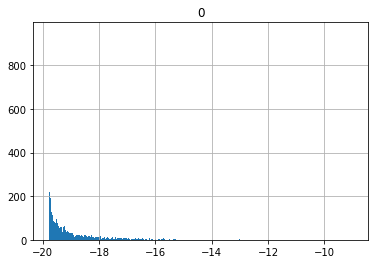

In [33]:
import pandas as pd
pd.DataFrame(test_sample_1).hist(bins=1000)

array([[<AxesSubplot:title={'center':'0'}>]], dtype=object)

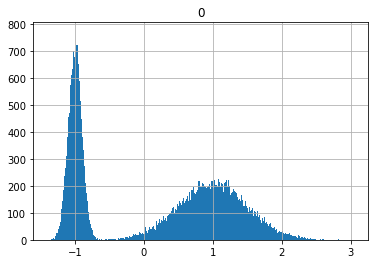

In [76]:
import pandas as pd
pd.DataFrame(test_sample_2).hist(bins=1000)

We compare (1) g✓(z) with
the true transformation function and (2) the empirical distribution from 10, 000 samples with PX